# Timber Beam Design Example

In [1]:
from timber import *

## Bending

The bending capacity of a timber section is given by:

\begin{align}
&M_{Rd} = \frac{k_{mod} k_h k_{sys} k_{crit} f_{mk}}{\gamma_m} Z\\
&Z = \frac{b h^2}{6}\\
&h \leq 150 \implies  k_h = \left(\frac{150}{h}\right)^{0.20}
\end{align}


It is assumed that the beams have adequate restraint such that $k_{crit} = 1$. For load sharing systems $k_{sys} = 1.1$ and for other systems $k_{sys} = 1.0$.

The partial factor for the timber is taken to be $\gamma_m=1.3$.

The shear capacity of a timber section is given by:

$$ V_{Rd} = \frac{k_{mod} f_{vk}}{\gamma_m} \frac{2}{3} bh $$

Design Bending Capacity: 3.51kNm
Design Shear Capacity: 7.50kN


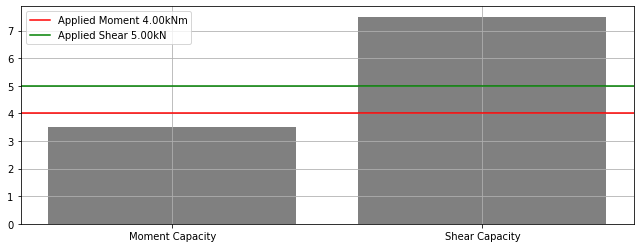

In [2]:
# For a timber section and print the capacities
b1 = TimberBeam(b=50, h=195, grade='C24', ksys=1, service_class=1)
b1.print_capacities(4, 5)

## Axial Compression

\begin{align}
\lambda_{rel,y} = \frac{\lambda_y}{\pi} \sqrt{\frac{f_{c,0,k}}{E_{0.005}}} \text{ Where } \lambda_y = \frac{le_y}{r_y}\\
\lambda_{rel,z} = \frac{\lambda_z}{\pi} \sqrt{\frac{f_{c,0,k}}{E_{0.005}}} \text{ Where } \lambda_z = \frac{le_z}{r_z}\\
\end{align}

# Racking Shear Calculations

The design racking strength of a wall diaphragm $F_{i,v,Rd} = K_{opening} K_{i,w} f_{p,d,t} L$

Where: $f_{p,d,t} = f_{p,d,1} + K_{comb} f_{p,d,2}$

The design shear capacity per unit length of the perimeter fasteners to the sheathing ($f_{p,d}$) is given by:

$$f_{p,d} = \frac{1.2 F_{t,Rd} (1+2.5s)}{s}$$

Where $F_{f,Rd}$ is the design capacity of a single fixing.

# Connections

## Withdrawal Capacities

In [3]:
withdrawalData = {'C16':[5.09,5.38,5.77,5.96,6.44,7.21,7.69],
                 'C24':[6.49,6.86,7.35,7.60,8.21,9.19,9.80]}
withdrawal = pd.DataFrame(withdrawalData)
nailDiameters = [2.65, 2.80, 3, 3.1, 3.35, 3.75, 4]
withdrawal.index = nailDiameters
print('Characteristic withdrawal resistance for smooth nails:')
display(withdrawal)

Characteristic withdrawal resistance for smooth nails:


,C16,C24
2.65,5.09,6.49
2.80,5.38,6.86
3.00,5.77,7.35
3.10,5.96,7.60
3.35,6.44,8.21
3.75,7.21,9.19
4.00,7.69,9.80


The withdrawl load of a screw is given by:

$$R_{d,withdrawal} = \frac{4t_{pen}nk_{mod}R_k}{\gamma_M}$$

In [4]:
# axial withdrawal load for a screw 
# tpen >= 8 x nominal diameter
grade = 'C24'
n = 1
d = 4
Rk = withdrawal.loc[d,grade]
kmod = 0.6
tpen = 120
gm = 1.3

Rdw = 4 * tpen * n * kmod * Rk / gm
print('Withdrawl capacity of a {:.2f}mm diameter nail with a pointside penetration of {:.2f}mm is {:.2f}N'.
      format(d, tpen, Rdw))


Withdrawl capacity of a 4.00mm diameter nail with a pointside penetration of 120.00mm is 2171.08N


# Force effects

## Deflection

Combined bending and shear deflection is a simply supported beam is given by:

$$\delta = \frac{5wl^4}{384EI} + \frac{V_{app}}{8 G_m bd}$$

In [5]:
grade_ref = 'C24'
E = timber_properties.loc[grade_ref, 'E0m']

NameError: name 'timber_properties' is not defined